In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')


# https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [2]:
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# check for missing values in each column
print("Missing values:", df.isna().sum().any())

Missing values: False


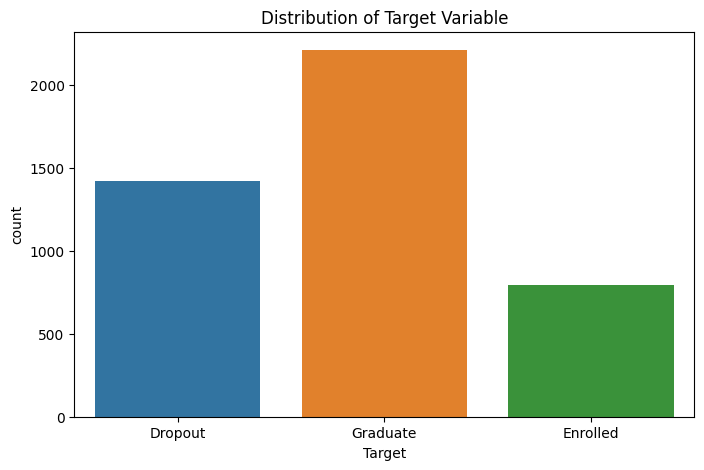

In [4]:
# plot the distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Target")
plt.title("Distribution of Target Variable")
plt.show()

In [5]:
# Plotting histograms for each column in the dataset

'''

num_columns = len(df.columns)
plt.figure(figsize=(20, 4 * num_columns))

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_columns, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


for col in df.columns:
    length = len(df[col].unique())
    #if (length < 10):
    print(col,":", length)

'''

'\n\nnum_columns = len(df.columns)\nplt.figure(figsize=(20, 4 * num_columns))\n\nfor i, col in enumerate(df.columns, 1):\n    plt.subplot(num_columns, 3, i)\n    sns.histplot(df[col], bins=30, kde=True)\n    plt.title(f\'Distribution of {col}\')\n    plt.tight_layout()\n\nplt.show()\n\n\nfor col in df.columns:\n    length = len(df[col].unique())\n    #if (length < 10):\n    print(col,":", length)\n\n'

Features
Name, type, unique count or range

Marital Status - Categorical - 6
Application Mode - Categorical - 18
Application Order - Continuous - 0 to 10
Course - Categorical - 17
Daytime/evening attendance - binary - 2
Previous qualifications - Categorical - 17

In [6]:
from sklearn.model_selection import cross_val_score

def encode_target(x):
    if x == "Graduate":
        return 1
    elif x == "Dropout":
        return 0
    else:
        return x

df = df[df['Target'].isin(['Dropout', 'Graduate'])]

prepared_df = pd.DataFrame()

# one hot encoding for categorical variables with small number of unique values
one_hot_columns = ["Application mode", "Marital status", "Mother's qualification", 
                   "Father's qualification", "Mother's occupation", 
                   "Father's occupation", "Nacionality", "Course"]

one_hot_encoded_df = pd.DataFrame()
for col in one_hot_columns:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, one_hot_encoded], axis=1)

# ordinal variables
ordinal_column_names = ['Application order']
prepared_df = pd.concat([prepared_df, df[ordinal_column_names]], axis=1)

# binary variables
binary_column_names = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
prepared_df = pd.concat([prepared_df, df[binary_column_names]], axis=1)

# continuous variables
continuous_column_names = ['Admission grade', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
prepared_df = pd.concat([prepared_df, df[continuous_column_names]], axis=1)

curricular_units_cols = [col for col in df.columns if col.startswith("Curricular units")]
prepared_df = pd.concat([prepared_df, df[curricular_units_cols]], axis=1)

# encoding the target column
df_target = df['Target'].apply(encode_target)
# print(df_target)

x = prepared_df
y = df_target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training and testing data shape", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print("Total Columns: ", len(prepared_df.columns))


Training and testing data shape (2541, 26) (1089, 26) (2541,) (1089,)
Total Columns:  26


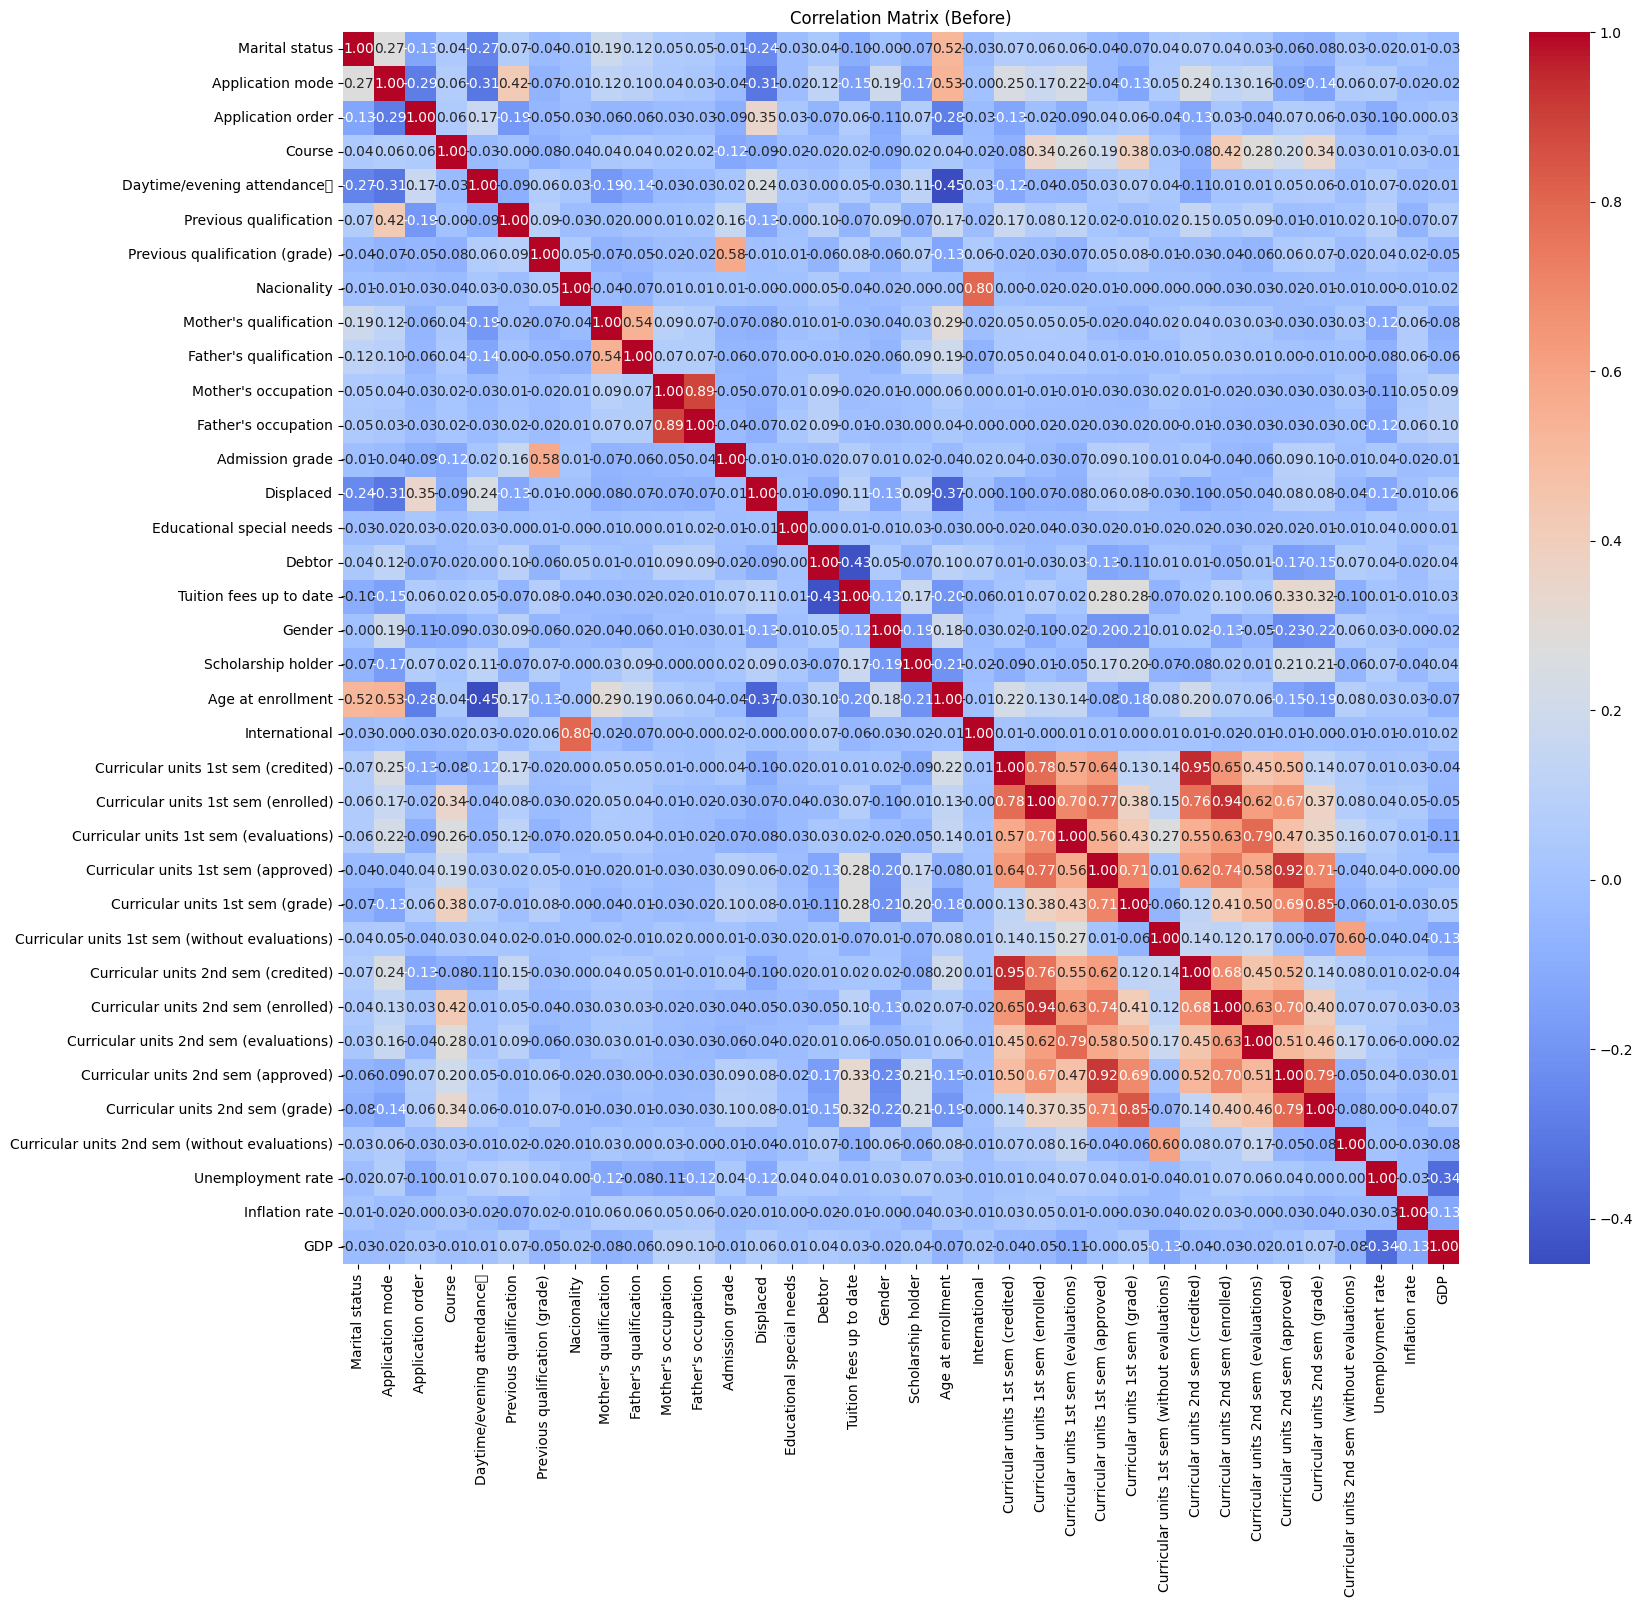

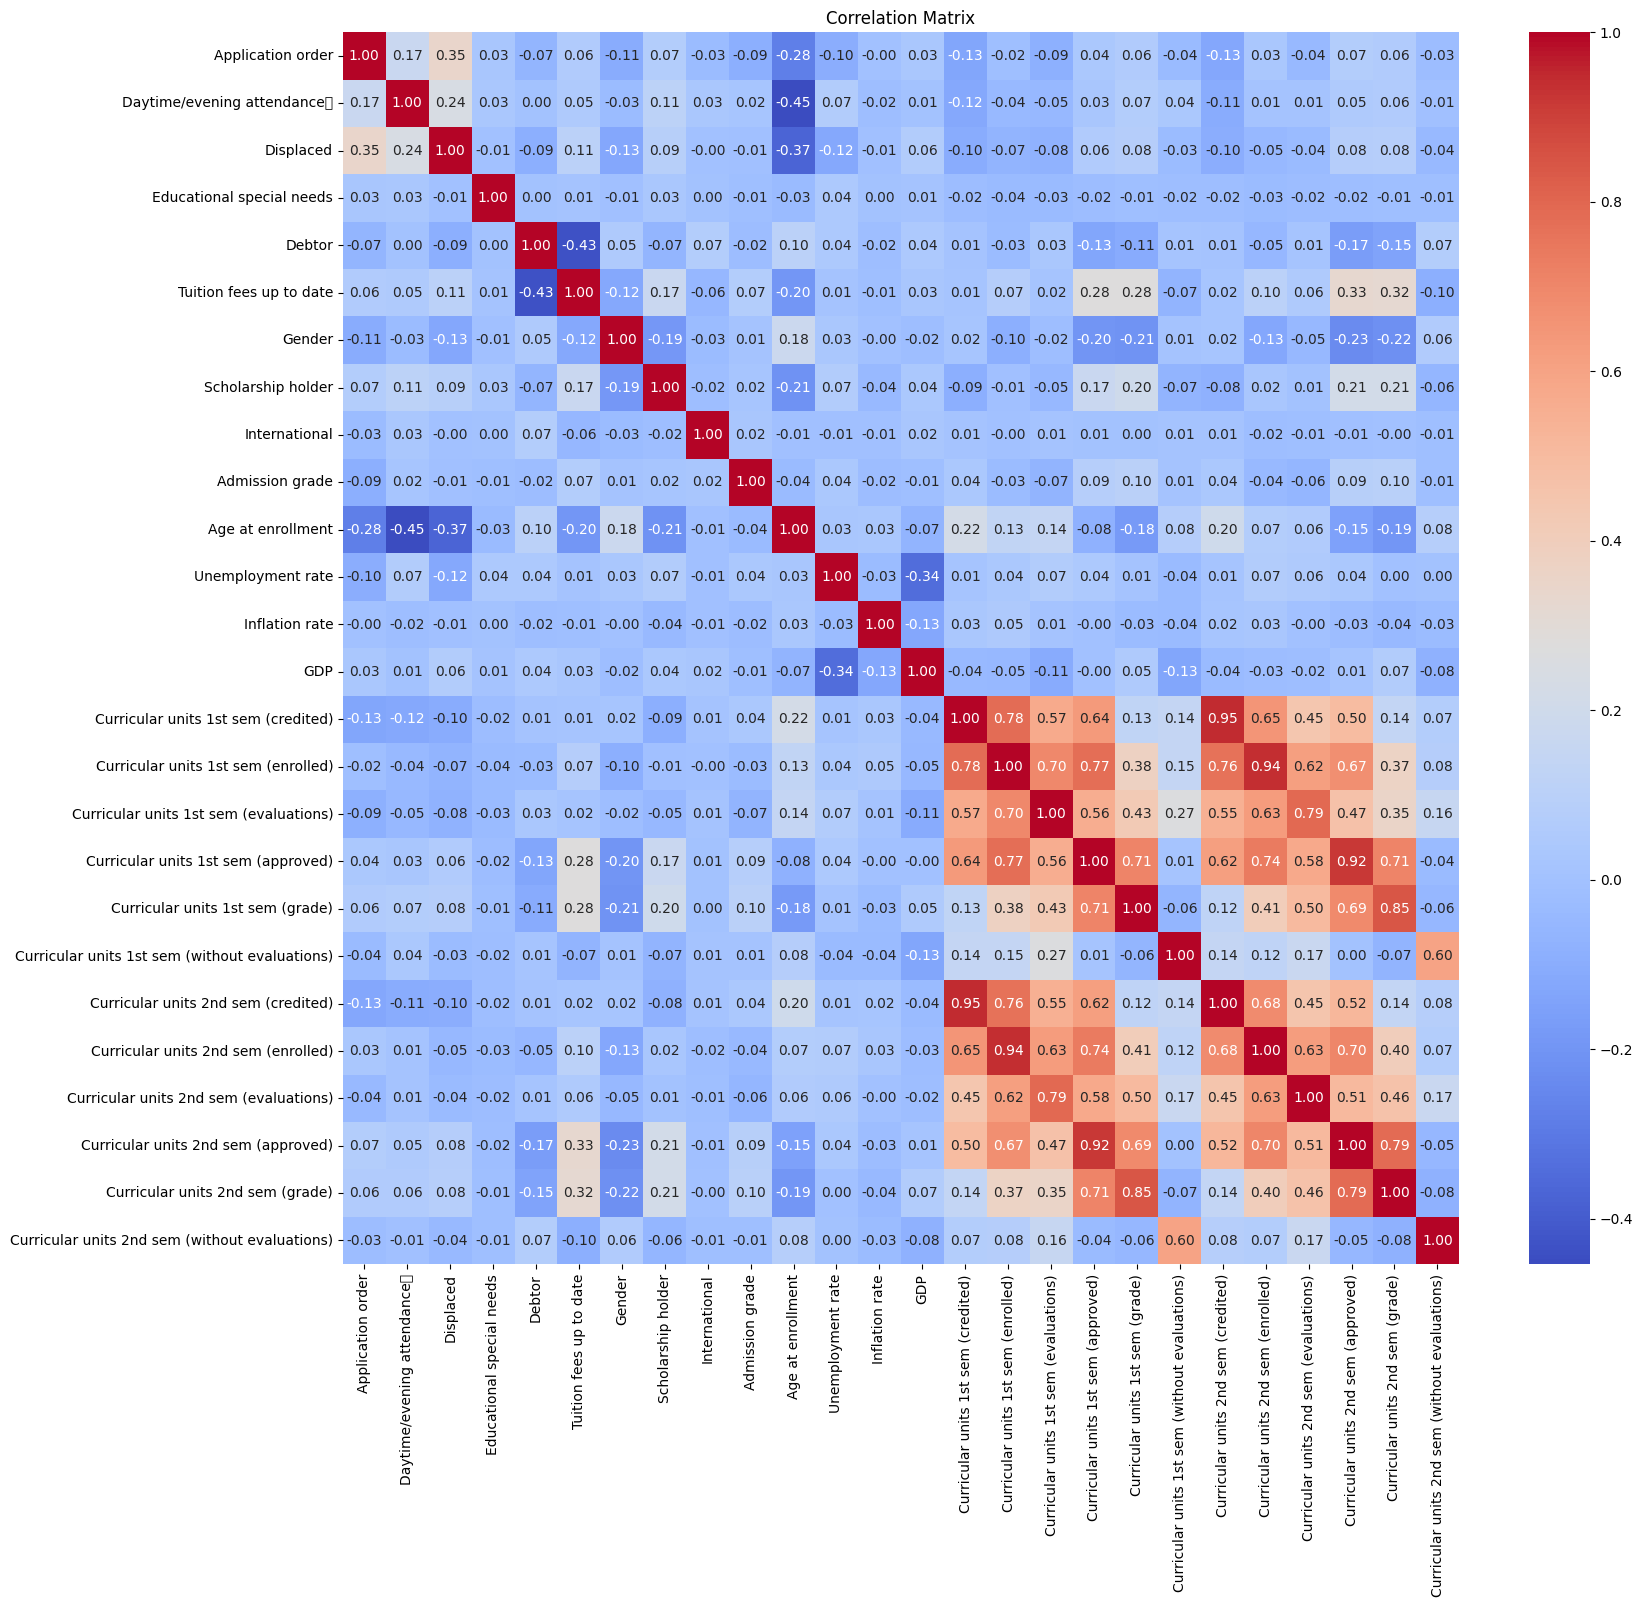

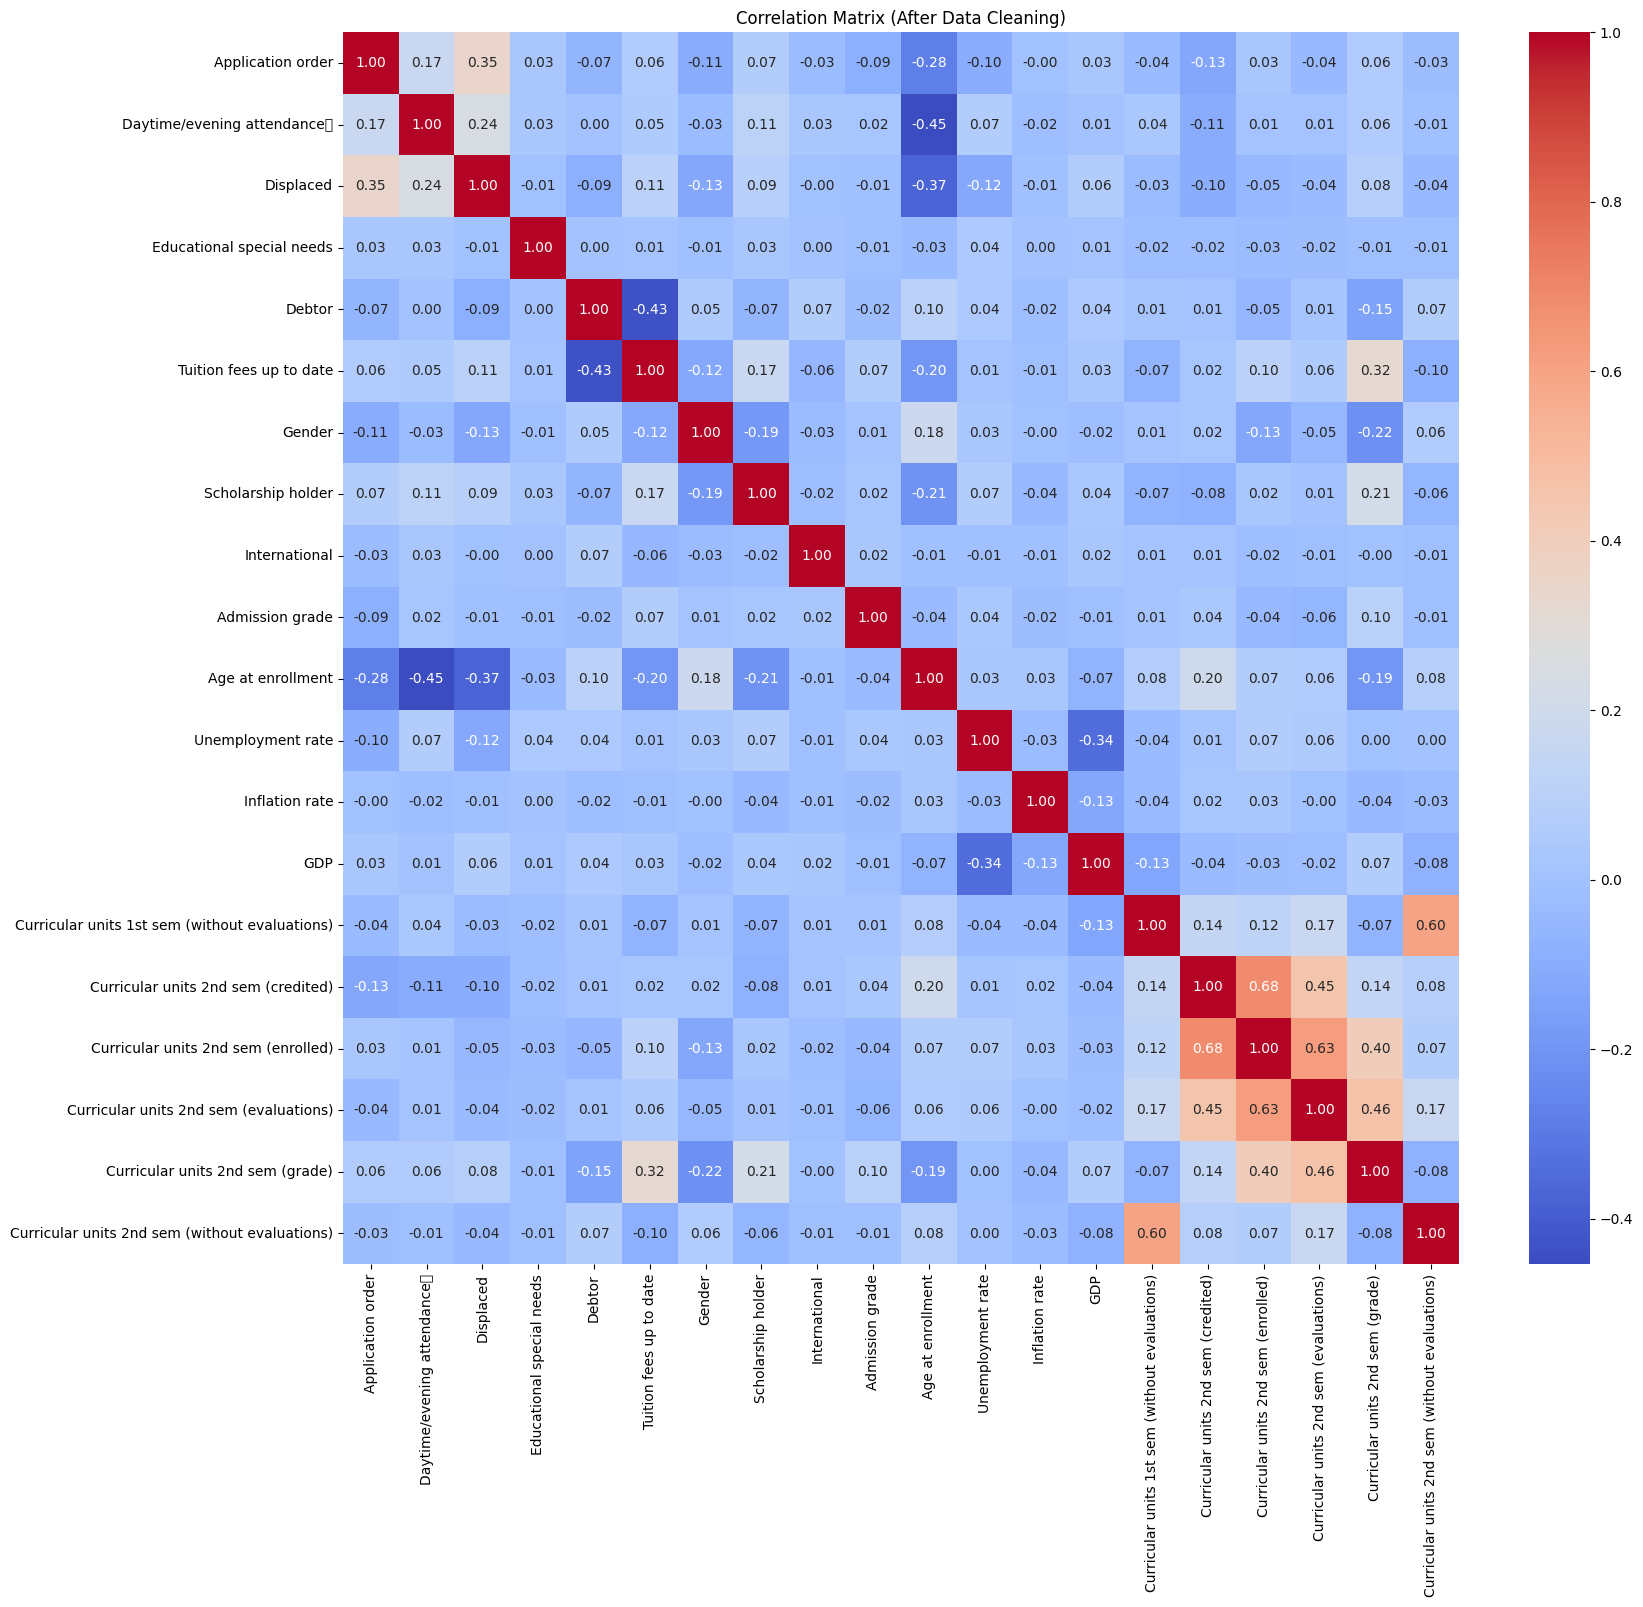

Total Columns after removing highly correlated columns:  20


In [13]:
correlation_matrix = prepared_df.corr()
a = df.drop(columns=['Target'], axis=1).corr()
plt.figure(figsize=(18, 16))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Before)")
plt.show()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# flatten the correlation matrix
correlation_df = correlation_matrix.unstack().reset_index()

correlation_df.columns = ['Variable_1', 'Variable_2', 'Correlation']

# sort the DataFrame on the absolute value of the correlation
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# remove correlation of variables with themselves
correlation_df = correlation_df[correlation_df['Variable_1'] != correlation_df['Variable_2']]

# remove duplicates
correlation_df[['Variable_1', 'Variable_2']] = np.sort(correlation_df[['Variable_1', 'Variable_2']], axis=1)
correlation_df = correlation_df.drop_duplicates(subset=['Variable_1', 'Variable_2'])

# find high correlation
high_corr_pairs = correlation_df[correlation_df['Correlation'].abs() > 0.7]

# find columns names to drop
variables_to_drop = set()
for _, row in high_corr_pairs.iterrows():
    if row['Variable_1'] not in variables_to_drop and row['Variable_2'] not in variables_to_drop:
        variables_to_drop.add(row['Variable_1'])

prepared_df_filtered = prepared_df.drop(columns=variables_to_drop)

plt.figure(figsize=(18, 16))
sns.heatmap(prepared_df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Data Cleaning)")
plt.show()

print("Total Columns after removing highly correlated columns: ", len(prepared_df_filtered.columns))

### Logistic Regression All Data

In [260]:
model = LogisticRegression()

model.fit(x_train, y_train)

print("score: ", model.score(x_test, y_test))

# find proportion in test set
class_proportions = y_test.value_counts(normalize=True)
baseline_accuracy = class_proportions.max()
print("Baseline accuracy:", baseline_accuracy)

scores = cross_val_score(model, x, y, cv=10)

# Print the accuracy for each fold
print("Accuracy for each fold:")
print(scores)

#for feature, coef in zip(x_train.columns, model.coef_[0]):
#    print(feature, coef)

score:  0.9100091827364555
Baseline accuracy: 0.6198347107438017
Accuracy for each fold:
[0.91460055 0.92011019 0.90633609 0.8953168  0.90909091 0.90633609
 0.89256198 0.91735537 0.90633609 0.90909091]


### Logistic Regression with multicollinearity removed

In [261]:
x_filtered = prepared_df_filtered

x_train, x_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(x_train, y_train)

print("score: ", model.score(x_test, y_test))


score:  0.8631772268135904


### Logistic Regression Model Summary

In [262]:

drop_columns = ['Application mode', 'Marital status', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Nacionality", "Previous qualification", "Previous qualification (grade)", "Target"]

prepared_df_no_categorical = df.drop(columns=drop_columns)

x_no_categorical = prepared_df_no_categorical

x_train_no_categorical, x_test_no_categorical, y_train_no_categorical, y_test_no_categorical = train_test_split(x_no_categorical, y, test_size=0.3, random_state=42)

x_train_const = sm.add_constant(x_train_no_categorical)

bool_cols = x_train_const.select_dtypes(include=['bool']).columns
x_train_const[bool_cols] = x_train_const[bool_cols].astype(int)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for each variable
vif_data = calculate_vif(x_train_const)
print(vif_data[vif_data['VIF'] > 10])


# Fit the logistic regression model
model_sm_no_categorical = sm.Logit(y_train_no_categorical, x_train_const).fit()

# View the summary of the model
print(model_sm_no_categorical.summary())



# Make predictions on the test set
predictions = model_sm_no_categorical.predict(sm.add_constant(x_test_no_categorical))

# Convert predictions to binary outcomes
predictions_binary = np.round(predictions)

# Calculate accuracy
accuracy = np.mean(predictions_binary == y_test_no_categorical)
print("Accuracy:", accuracy)

                               Variable         VIF
0                                 const  187.283635
13  Curricular units 1st sem (credited)   17.741382
14  Curricular units 1st sem (enrolled)   25.127445
16  Curricular units 1st sem (approved)   16.271849
19  Curricular units 2nd sem (credited)   13.391593
20  Curricular units 2nd sem (enrolled)   17.642796
22  Curricular units 2nd sem (approved)   13.284784
Optimization terminated successfully.
         Current function value: 0.234760
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 2541
Model:                          Logit   Df Residuals:                     2513
Method:                           MLE   Df Model:                           27
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.6504
Time:                        12:48:33   Log-Likelihood:                -596.53
converge

In [263]:
# Things we could try - decision tree, SVM (Support Vector Model), Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

modelRandomForestClassifier = RandomForestClassifier()
modelRandomForestClassifier.fit(x_train, y_train)

print(modelRandomForestClassifier.score(x_test, y_test))


0.8622589531680441


In [264]:
from sklearn.tree import DecisionTreeClassifier
modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(x_train, y_train)

print(modelDecisionTree.score(x_test, y_test))

0.8135904499540864


In [265]:
from sklearn import svm
modelSVM = svm.SVC()
modelSVM.fit(x_train, y_train)

print(modelSVM.score(x_test, y_test))

0.7897153351698806
